In [1]:
# imports
import random

from PIL import Image, ImageFilter
from skimage.filters import sobel, laplace
import numpy as np
import matplotlib.pyplot as plt

import graphlearning as gl
immat_area_im = Image.open(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\Immature_DC\immature-cell-1\immature-area.tif")
immat_area_array = np.array(immat_area_im)
mat_area_im = Image.open(r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\Mature_DC\mature-cell-1\mature-area.tif")
mat_area_array = np.array(mat_area_im)

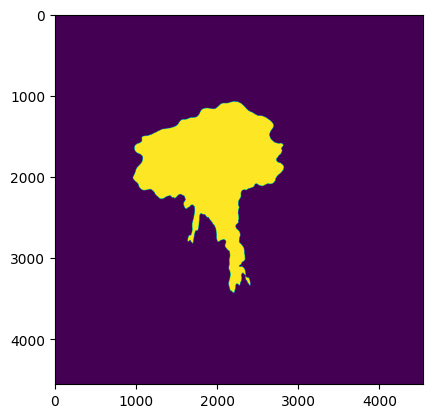

In [2]:
# Apply mode filter to the area mask
image = immat_area_im.filter(ImageFilter.ModeFilter(size=75))
immat_smoothed = np.array(image)
plt.imshow(immat_smoothed)

## What happens to eigenvalues as the smoothing kernel gets bigger?
Larger smoothing kernels will lose details and smaller features (filopodiae) and should change the eigenvalues. 

In [3]:
# Apply mode filter to the area mask
def smooth_image(image, kernel_size):
    im = image.filter(ImageFilter.ModeFilter(size=kernel_size))
    return np.array(im)

smoothed_dict = dict()
for k in [3, 6, 9, 15, 25, 50, 75]:
    smoothed_dict[k] = smooth_image(immat_area_im, k)

In [4]:
def sample(im_array, N=5000): 
    u = im_array.nonzero()
    im_normal = (u[0] / im_array.shape[0], u[1] / im_array.shape[1])
    im_nonzero = np.array(list(map(list, zip(*im_normal)))) # nonzero points in the area
    y = im_nonzero[np.random.choice(im_nonzero.shape[0], N, replace=False), :]
    return y

def GFT(im_points, k=25, r=500):
    W = gl.weightmatrix.knn(im_points, k)
    G = gl.graph(W)
    print("Graph is connected: ", G.isconnected())
    return G.eigen_decomp(k=r,normalization='normalized', method="lowrank")

In [5]:
evals_dict = dict()
for k in smoothed_dict.keys():
    image = smoothed_dict[k]
    sampled_image = sample(image)
    evals, _ = GFT(sampled_image, k=25, r=500)
    evals_dict[k] = evals

Graph is connected:  True
Graph is connected:  True
Graph is connected:  True
Graph is connected:  True
Graph is connected:  True
Graph is connected:  True
Graph is connected:  True


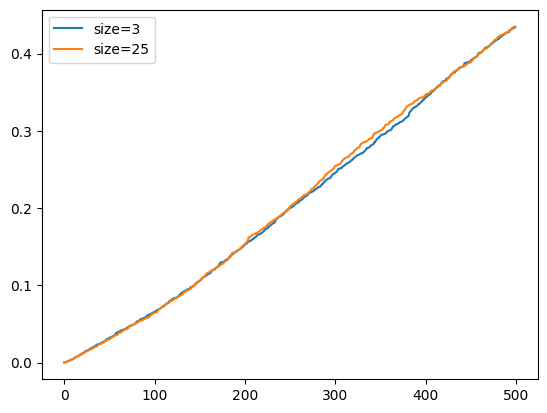

In [10]:
for k in [3, 25]:
    plt.plot(evals_dict[k][:500], label="size="+str(k))
plt.legend()
plt.show()

In [14]:
edges_1 = sobel(smoothed_dict[3])
edges_1 = (edges_1 > 0).astype(np.uint8) * 255
edges_2 = sobel(smoothed_dict[25])
edges_2 = (edges_2 > 0).astype(np.uint8) * 255
edges_3 = sobel(smoothed_dict[75])
edges_3 = (edges_3 > 0).astype(np.uint8) * 255

Graph is connected:  True
Graph is connected:  True
Graph is connected:  True


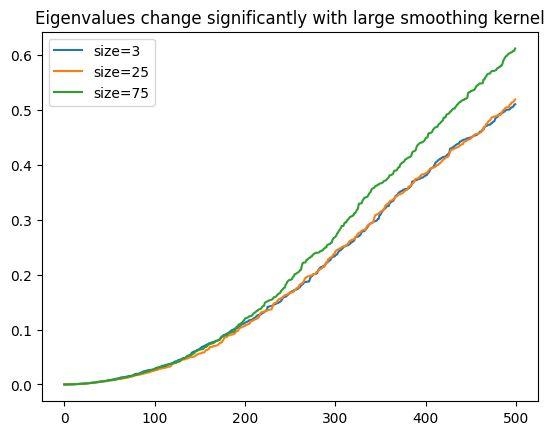

In [15]:
plt.plot(GFT(sample(edges_1))[0], label="size=3")
plt.plot(GFT(sample(edges_2))[0], label="size=25")
plt.plot(GFT(sample(edges_3))[0], label="size=75")
plt.legend()
plt.title("Eigenvalues change significantly with larger smoothing kernel")
# Look at derivatives of eigenvalues here too - change much more
plt.show()